In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import libraries

import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
name = pd.read_excel("/content/short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("/content/short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)     
ocf = pd.read_excel("/content/short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("/content/short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("/content/short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("/content/short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("/content/short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("/content/short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("/content/short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("/content/short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("/content/short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("/content/short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("/content/short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("/content/short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("/content/short_data.xlsx", sheet_name="EBIT", index_col=0)
eps = pd.read_excel("/content/short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("/content/short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("/content/short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("/content/short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("/content/short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)

# Biến vĩ mô
gdp = pd.read_excel("/content/short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("/content/short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("/content/short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [ ]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)      
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape # (516, 2) --> 516 remained companies

168


(516, 2)

In [ ]:
# Fill Avg. Inventory days: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum()) 

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum()) 

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum()) 

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum()) 

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum()) 


48
0
0
0
0
0
0
0


In [ ]:
# Function converts negative values to positive

def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]
fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [ ]:
# Calculate NI
ni = roa * ta

# Calculate Size
size = np.log(mv)

# Calculate Leverage
lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio 
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio 
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# Calculate Net profit margin
net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# Calculate ROE
roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days


In [ ]:
# Drop year 2009
ni.drop(ni.index[0], axis='index', inplace=True)   
ocf.drop(ocf.index[0], axis='index', inplace=True)   
size.drop(size.index[0], axis='index', inplace=True)   
lev.drop(lev.index[0], axis='index', inplace=True)   
ppe.drop(ppe.index[0], axis='index', inplace=True)   
liq.drop(liq.index[0], axis='index', inplace=True)  
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True) 
quick.drop(quick.index[0], axis='index', inplace=True) 
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True) 
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True) 
dso.drop(dso.index[0], axis='index', inplace=True) 
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True) 
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True) 
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True) 
net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True) 
bep.drop(bep.index[0], axis='index', inplace=True) 
roe.drop(roe.index[0], axis='index', inplace=True) 
roa.drop(roa.index[0], axis='index', inplace=True) 
eps.drop(eps.index[0], axis='index', inplace=True) 
ccc.drop(ccc.index[0], axis='index', inplace=True) 
gdp.drop(gdp.index[0], axis='index', inplace=True)  
cpi.drop(cpi.index[0], axis='index', inplace=True)  
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)

In [ ]:
# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

# Các công ty thành lập sau năm 2010 được thay thế age bằng np.nan nếu age bị âm.
age = age.replace(list(range(-5,0)), np.NaN)

In [ ]:
# NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và dòng tiền dương từ hoạt động kd)
# NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 516), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

      CHP.HM  POM.HM  V21.HN  LIG.HN  MCC.HN  TET.HN  KSD.HN  TDC.HM  OGC.HM  HTC.HN  NVT.HM  VCM.HN  SPM.HM  CX8.HN  TNT.HM  HU1.HM  SBA.HM  IDV.HN  AME.HN  PXS.HM  DTL.HM  PDN.HM  VXB.HN  PXI.HM  NNC.HM  DLG.HM  CMV.HM  VE3.HN  BCE.HM  UDC.HM  DC2.HN  LCS.HN  DTA.HM  AAA.HM  LDP.HN  DRH.HM  SMT.HN  HHG.HN  VRC.HM  VE2.HN  HMH.HN  PDR.HM  VLA.HN  PCT.HN  CVN.HN  QCG.HM  MIM.HN  WCS.HN  NET.HN  IDJ.HN  VOS.HM  SHP.HM  PTL.HM  HVX.HM  VMD.HM  OCH.HN  APP.HN  HAT.HN  TIG.HN  C32.HM  SMA.HM  ELC.HM  DSN.HM  HQC.HM  TDW.HM  ARM.HN  KTT.HN  LM7.HN  SCR.HM  CMX.HM  LM8.HM  LCD.HN  PRC.HN  CMS.HN  VNF.HN  VKC.HN  EVE.HM  VAT.HN  PV2.HN  HTI.HM  VSI.HM  ADC.HN  HDA.HN  PCG.HN  KST.HN  KTS.HN  BSC.HN  PPS.HN  HTL.HM  CLW.HM  TVD.HN  MDG.HM  PTD.HN  NKG.HM  TSB.HN  VCF.HM  MCF.HN  DNM.HN  D11.HN  CCL.HM  HU3.HM  C47.HM  DIH.HN  NDN.HN  VIE.HN  IDI.HM  JVC.HM  PTB.HM  CIG.HM  INC.HN  THG.HM  HOT.HM  SVN.HN  L14.HN  GMX.HN  SVT.HM  LCM.HM  PPE.HN  FLC.HM  CNG.HM  BRC.HM  HHS.HM  GSP.HM  AMC.HN  LA

In [ ]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
data['Net profit margin'] = net_profit_margin.values.flatten()
data['ROA'] = roa.values.flatten()
data['ROE'] = roe.values.flatten()
data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)   # (5676, 24) --> 5676 observations, 23 independent variables, 1 target column
data

(5676, 24)


Size  Leverage    Growth       PPE  Liquidity   Age  \
Year Company                                                             
2010 CHP.HM   26.811996  0.526188       NaN       NaN   5.263539   6.0   
     POM.HM   29.308265  0.631919  0.485906  0.161338   1.399731  11.0   
     V21.HN   24.511991  0.909509  0.728948  0.044329   1.194372   5.0   
     LIG.HN   26.171438  0.810075  0.669013  0.281770   1.406351  14.0   
     MCC.HN   25.514182  0.071271  0.189628  0.244802   5.807324   4.0   
...                 ...       ...       ...       ...        ...   ...   
2020 DAG.HM   26.623564  0.610937  0.074296  0.402745   1.166272  19.0   
     PVL.HN   25.277143  0.410206  0.589727  1.957516   0.909948  13.0   
     CCI.HM   26.508283  0.602509 -0.244980  0.171636  11.352394  28.0   
     PPP.HN   25.322819  0.256210 -0.226251  0.588233   1.761310  20.0   
     IJC.HM   28.842630  0.688299  0.338464  0.440331   1.481065  13.0   

              Quick ratio  Inventory turnover ratio  FA turnover ratio  \
Year Company                                                             
2010 CHP.HM           NaN                 36.590461                NaN   
     POM.HM      0.717048                  4.051764           2.270428   
     V21.HN      0.274740                  1.559963          19.697700   
     LIG.HN      0.945083                  3.843361           0.512498   
     MCC.HN      4.116953                  6.262846          10.374847   
...                   ...                       ...                ...   
2020 DAG.HM      0.447435                  2.871849          15.073621   
     PVL.HN      0.874132                  3.989148           0.574304   
     CCI.HM     10.813581                 20.879260           3.837863   
     PPP.HN      1.307953                  8.275423           3.926553   
     IJC.HM      0.786886                  0.968705           3.538940   

              TA turnover ratio          DSO  Capital intensity  \
Year Company                                                      
2010 CHP.HM                 NaN          NaN                NaN   
     POM.HM            1.461675    97.303558           0.684146   
     V21.HN            1.132611    85.475842           0.882916   
     LIG.HN            0.895913   528.605058           1.116179   
     MCC.HN            0.733156    10.894706           1.363966   
...                         ...          ...                ...   
2020 DAG.HM            1.009896    14.679956           0.990201   
     PVL.HN            0.058207  1056.801314          17.180152   
     CCI.HM            0.419079    14.687985           2.386182   
     PPP.HN            0.808258    17.741317           1.237228   
     IJC.HM            0.322399    47.796188           3.101750   

              Expense of revenue ratio  Operating margin  Net profit margin  \
Year Company                                                                  
2010 CHP.HM                        NaN               NaN                NaN   
     POM.HM                   1.052063          0.005026           0.066280   
     V21.HN                   0.658292          0.037879           0.023508   
     LIG.HN                   2.505594          0.162164           0.055030   
     MCC.HN                   1.694083          0.187835           0.238117   
...                                ...               ...                ...   
2020 DAG.HM                   0.091568          0.017150           0.005769   
     PVL.HN                   1.822281          0.764657           0.027878   
     CCI.HM                   0.489455          0.034389           0.103947   
     PPP.HN                   0.381667          0.010540           0.079802   
     IJC.HM                   0.033609          0.063179           0.161416   

                   ROA       ROE         EPS       BEP         CCC       GDP  \
Year Company                                                                   
2010 CHP.HM   0.000000  0.000000 

In [ ]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'Net profit margin', 'ROE', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Leverage,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,Net profit margin,ROA,ROE,EPS,BEP,CCC,GDP,CPI,Interest rates,Target
count,5349.000000,5500.000000,5422.000000,5478.000000,5500.000000,5671.000000,5447.000000,5632.000000,5493.000000,5488.000000,5493.000000,5488.000000,5493.000000,5493.000000,5389.000000,5401.000000,5401.000000,5424.000000,5500.000000,5632.000000,5676.000000,5676.000000,5676.000000,5676.000000
mean,26.206681,0.503325,0.394154,0.805668,2.322255,14.539058,1.322715,859.604250,60.869434,1.208536,270.502417,3.561490,1.431539,0.156534,0.076003,0.063025,0.216005,1751.246467,0.092343,381.484782,6.001623,5.821202,3.797918,0.625264
std,1.706232,0.220097,3.452518,3.953259,2.593976,8.030378,3.531191,15613.972332,550.442808,1.208844,1073.990343,16.194301,4.363704,1.286881,0.508483,0.081622,0.641309,2237.747674,0.252319,1876.425356,1.131059,4.809275,2.944192,0.484097
min,21.716518,0.001981,-0.997369,0.000000,0.097129,0.000000,-31.298624,0.002441,0.000916,0.000257,0.000000,0.078533,0.000000,-22.413873,-6.612608,-0.787392,-8.810799,-11820.461130,-10.587992,-25121.662701,2.905836,0.631201,-3.551709,0.000000
25%,25.040748,0.339080,-0.089543,0.069949,1.124654,9.000000,0.496845,2.473381,1.914813,0.464491,26.725062,0.640350,0.453810,0.023277,0.017170,0.015613,0.041223,515.256803,0.022247,50.453632,5.421883,2.795824,2.294892,0.000000
50%,26.061765,0.525305,0.071820,0.188784,1.505083,13.000000,0.898045,4.971114,6.022258,0.919167,63.735184,1.087942,0.773390,0.060170,0.046602,0.048124,0.112584,1367.377280,0.058002,114.445307,6.240303,3.539628,4.825874,1.000000
75%,27.231882,0.676313,0.239977,0.479205,2.410178,19.000000,1.564948,11.715217,17.069339,1.561646,158.891812,2.152895,1.170790,0.141389,0.110268,0.093865,0.216295,2485.573435,0.114819,225.237739,6.812246,9.094703,5.814896,1.000000
max,33.590443,1.208426,87.358047,82.046364,19.737054,60.000000,33.586066,381933.400047,15679.062105,12.733542,12188.339931,246.062040,62.679250,22.582316,6.759415,0.839056,9.302494,25717.077680,7.906537,26335.734538,7.075789,18.677732,7.322258,1.000000


In [ ]:
# Drop rows that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)  # (5002, 24) --> Remains 5002 observations.

print(new_data.isnull().sum().sum()) # Clear all NaNs.

(5002, 24)
0


Set up new_data for each year then building model

In [ ]:
# dt_2010 = new_data.loc[2010,:]
# dt_2011 = new_data.loc[2011,:]
# dt_2012 = new_data.loc[2012,:]
# dt_2013 = new_data.loc[2013,:]
# dt_2014 = new_data.loc[2014,:]
# dt_2015 = new_data.loc[2015,:]
new_data = new_data.loc[2016,:]
# dt_2017 = new_data.loc[2017,:]
# dt_2018 = new_data.loc[2018,:]
# dt_2019 = new_data.loc[2019,:]
# dt_2020 = new_data.loc[2020,:]


In [ ]:

X = new_data.drop('Target', axis=1)
y = new_data.Target

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

optimal n_estimators value is 55 that accuracy is 0.7551020408163265


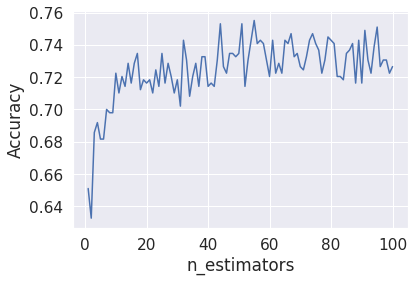

In [ ]:

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X_train, y_train)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

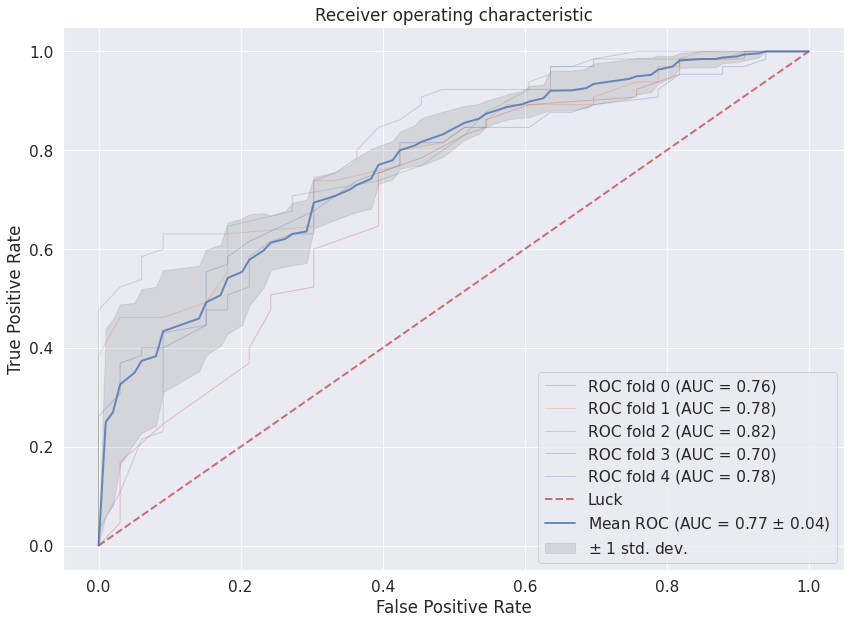

,AUC Train,AUC Test
0,1.0,0.758974
1,1.0,0.783683
2,1.0,0.816550
3,1.0,0.699534
4,1.0,0.778788


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)   

ROA                         0.086972
Leverage                    0.075136
Net profit margin           0.074591
BEP                         0.074403
ROE                         0.055437
Expense of revenue ratio    0.054829
DSO                         0.050287
Growth                      0.048620
Operating margin            0.047908
Size                        0.046938
CCC                         0.045723
Inventory turnover ratio    0.041828
Capital intensity           0.041573
FA turnover ratio           0.040121
EPS                         0.038573
PPE                         0.038017
TA turnover ratio           0.037185
Quick ratio                 0.036093
Liquidity                   0.035925
Age                         0.029842
GDP                         0.000000
CPI                         0.000000
Interest rates              0.000000
dtype: float64


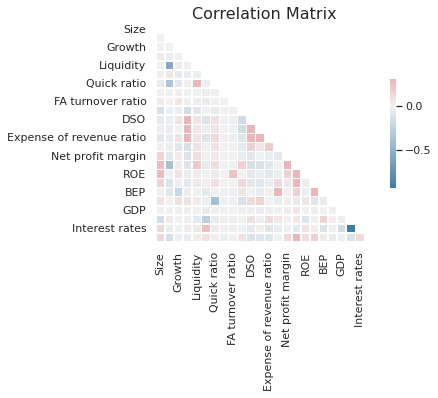

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

In [ ]:
y_pred = rf.predict(X_test)

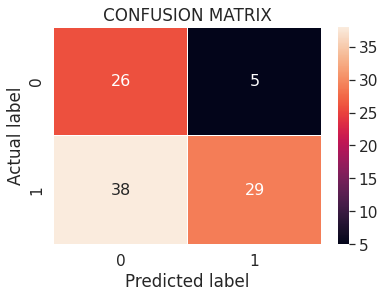

In [ ]:
LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.41      0.84      0.55        31
         1.0       0.85      0.43      0.57        67

    accuracy                           0.56        98
   macro avg       0.63      0.64      0.56        98
weighted avg       0.71      0.56      0.57        98



In [ ]:
y1 = rf.predict(X_train)
r = classification_report(y_train, y1)
print(r)

              precision    recall  f1-score   support

         0.0       0.42      0.81      0.55       134
         1.0       0.81      0.42      0.55       258

    accuracy                           0.55       392
   macro avg       0.62      0.62      0.55       392
weighted avg       0.68      0.55      0.55       392

